In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow 


In [ ]:
!pip install keras 

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import tensorflow as tf
from keras import backend as K



In [ ]:
import os

import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
from PIL import Image 
from skimage.io import imread as imread_raw

In [ ]:
path = '/content/drive/MyDrive/research2/segmentation/train/augmentation'
os.mkdir(path)

In [ ]:
path = '/content/drive/MyDrive/research2/segmentation/test'
os.mkdir(path)

In [ ]:
path = '/content/drive/MyDrive/research2/segmentation/train/mask'
os.mkdir(path)

In [ ]:
input_dir = os.path.join('/content','drive','MyDrive','research2')
segmentation_dir = os.path.join(input_dir,'segmentation')
segmentation_test_dir = os.path.join(segmentation_dir,'test')
segmentation_train_dir = os.path.join(segmentation_dir,'train')
segmentation_aug_dir = os.path.join(segmentation_train_dir,'augmentation')
segmentation_image_dir = os.path.join(segmentation_train_dir,'image')
segmentation_mask_dir= os.path.join(segmentation_train_dir,"mask")
segmentation_dilate_dir = os.path.join(segmentation_train_dir,"dilate")
shenzhen_train_dir = os.path.join(input_dir,"ChinaSet_AllFiles")
shenzhen_image_dir = os.path.join(shenzhen_train_dir,"CXR_png")
shenzhen_mask_dir = os.path.join(shenzhen_train_dir,"mask","mask1")
montgomery_train_dir = os.path.join(input_dir,"MontgomerySet")
montgomery_image_dir = os.path.join(montgomery_train_dir,"CXR_png")
montgomery_left_mask_dir = os.path.join(montgomery_train_dir,"ManualMask","leftMask")
montgomery_right_mask_dir = os.path.join(montgomery_train_dir ,"ManualMask","rightMask")
DILATE_KERNEL = np.ones((15, 15), np.uint8)
BATCH_SIZE=2
EPOCHS=56

In [ ]:
print(input_dir)
print(segmentation_dir)
print(segmentation_test_dir)
print(segmentation_train_dir)
print(segmentation_aug_dir)
print(segmentation_image_dir)
print(segmentation_mask_dir)
print(segmentation_dilate_dir)
print(shenzhen_train_dir)
print(shenzhen_image_dir)
print(shenzhen_mask_dir)
print(montgomery_train_dir)
print(montgomery_image_dir)
print(montgomery_left_mask_dir)
print(montgomery_right_mask_dir)

/content/drive/MyDrive/research2
/content/drive/MyDrive/research2/segmentation
/content/drive/MyDrive/research2/segmentation/test
/content/drive/MyDrive/research2/segmentation/train
/content/drive/MyDrive/research2/segmentation/train/augmentation
/content/drive/MyDrive/research2/segmentation/train/image
/content/drive/MyDrive/research2/segmentation/train/mask
/content/drive/MyDrive/research2/segmentation/train/dilate
/content/drive/MyDrive/research2/ChinaSet_AllFiles
/content/drive/MyDrive/research2/ChinaSet_AllFiles/CXR_png
/content/drive/MyDrive/research2/ChinaSet_AllFiles/mask/mask1
/content/drive/MyDrive/research2/MontgomerySet
/content/drive/MyDrive/research2/MontgomerySet/CXR_png
/content/drive/MyDrive/research2/MontgomerySet/ManualMask/leftMask
/content/drive/MyDrive/research2/MontgomerySet/ManualMask/rightMask


In [ ]:
print(shenzhen_mask_dir)

['/content/drive/MyDrive/research2/ChinaSet_AllFiles/mask/mask1/CHNCXR_0004_0_mask.png', '/content/drive/MyDrive/research2/ChinaSet_AllFiles/mask/mask1/CHNCXR_0005_0_mask.png', '/content/drive/MyDrive/research2/ChinaSet_AllFiles/mask/mask1/CHNCXR_0001_0_mask.png', '/content/drive/MyDrive/research2/ChinaSet_AllFiles/mask/mask1/CHNCXR_0006_0_mask.png', '/content/drive/MyDrive/research2/ChinaSet_AllFiles/mask/mask1/CHNCXR_0003_0_mask.png', '/content/drive/MyDrive/research2/ChinaSet_AllFiles/mask/mask1/CHNCXR_0007_0_mask.png', '/content/drive/MyDrive/research2/ChinaSet_AllFiles/mask/mask1/CHNCXR_0002_0_mask.png', '/content/drive/MyDrive/research2/ChinaSet_AllFiles/mask/mask1/CHNCXR_0044_0_mask.png', '/content/drive/MyDrive/research2/ChinaSet_AllFiles/mask/mask1/CHNCXR_0053_0_mask.png', '/content/drive/MyDrive/research2/ChinaSet_AllFiles/mask/mask1/CHNCXR_0057_0_mask.png', '/content/drive/MyDrive/research2/ChinaSet_AllFiles/mask/mask1/CHNCXR_0043_0_mask.png', '/content/drive/MyDrive/researc

In [ ]:
montgomery_left_mask_dir_1 = glob(os.path.join(montgomery_left_mask_dir, '*.png'))
montgomery_test = montgomery_left_mask_dir_1[0:50]
montgomery_train= montgomery_left_mask_dir_1[50:]

for left_image_file in tqdm(montgomery_left_mask_dir_1):
    base_file = os.path.basename(left_image_file)
    image_file = os.path.join(montgomery_image_dir, base_file)
    right_image_file = os.path.join(montgomery_right_mask_dir, base_file)

    image = cv2.imread(image_file)
    left_mask = cv2.imread(left_image_file, cv2.IMREAD_GRAYSCALE)
    right_mask = cv2.imread(right_image_file, cv2.IMREAD_GRAYSCALE)
    
    image = cv2.resize(image, (512, 512))
    left_mask = cv2.resize(left_mask, (512, 512))
    right_mask = cv2.resize(right_mask, (512, 512))
    
    mask = np.maximum(left_mask, right_mask)
    mask_dilate = cv2.dilate(mask, DILATE_KERNEL, iterations=1)
    
    if (left_image_file in montgomery_train):
        cv2.imwrite(os.path.join(segmentation_image_dir, base_file), \
                    image)
        cv2.imwrite(os.path.join(segmentation_mask_dir, base_file), \
                    mask)
        cv2.imwrite(os.path.join(segmentation_dilate_dir, base_file), \
                    mask_dilate)
    else:
        filename, fileext = os.path.splitext(base_file)
        cv2.imwrite(os.path.join(segmentation_test_dir, base_file), \
                    image)
        cv2.imwrite(os.path.join(segmentation_test_dir, \
                                 "%s_mask%s" % (filename, fileext)), mask)
        cv2.imwrite(os.path.join(segmentation_test_dir, \
                                 "%s_dilate%s" % (filename, fileext)), mask_dilate)

100%|██████████| 138/138 [06:31<00:00,  2.84s/it]


In [ ]:
montgomery_left_mask_dir_1 = glob(os.path.join(montgomery_left_mask_dir,"*.png"))
montgomery_test = montgomery_left_mask_dir_1[0:50]
montgomery_train = montgomery_left_mask_dir_1[50:]

In [ ]:
  def add_colored_dilate(image,mask_image,dilate_image):
     mask_image_gray = cv2.cvtColor(mask_image,cv2.COLOR_BGR2GRAY)
     dilate_image_gray = cv2.cvtColor(dilate_image,cv2.COLOR_BGR2GRAY)
     mask = cv2.bitwise_and(mask_image,mask_image,mask=mask_image_gray)
     dilate = cv2.bitwise_and(dilate_image,dilate_image,mask=dilate_image_gray)
     mask_coord = np.where(mask!=[0,0,0])
     dilate_coord = np.where(dilate!=[0,0,0])

     mask[mask_coord[0],mask_coord[1],:] = [255,0,0]
     dilate[dilate_coord[0],dilate_coord[1],:] = [0,0,255]

     ret = cv2.addWeighted(image,0.7,dilate,0.3,0)
     ret = cv2.addWeighted(ret,0.7,mask,0.3,0)

     return ret
  def add_colored_mask(image,mask_image):
    mask_image_grey = cv2.cvtColor(mask_image,cv2.COLOR_BGR2GRAY)

    mask = cv2.bitwise_and(mask_image,mask_image,mask=mask_image_grey)

    mask_coord = np.where(mask!=[0,0,0])

    mask[mask_coord[0],mask_coord[1],:] = [255,0,0]

    ret = cv2.addWeighted(image,0.7,mask,0.3,0)

    return ret
  def diff_mask(ref_image,mask_image):
    mask_image_gray = cv2.cvtColor(mask_image,cv2.COLOR_BGR2GRAY)

    mask = cv2.bitwise_and(mask_image,mask_image,mask=mask_image_gray)

    mask_coord = np.where(mask!=[0,0,0])

    mask[mask_coord[0],mask_coord[1],:] = [255,0,0]

    ret = cv2.addWeighted(ref_image,0.7,mask,0.3,0)
    return ret





  

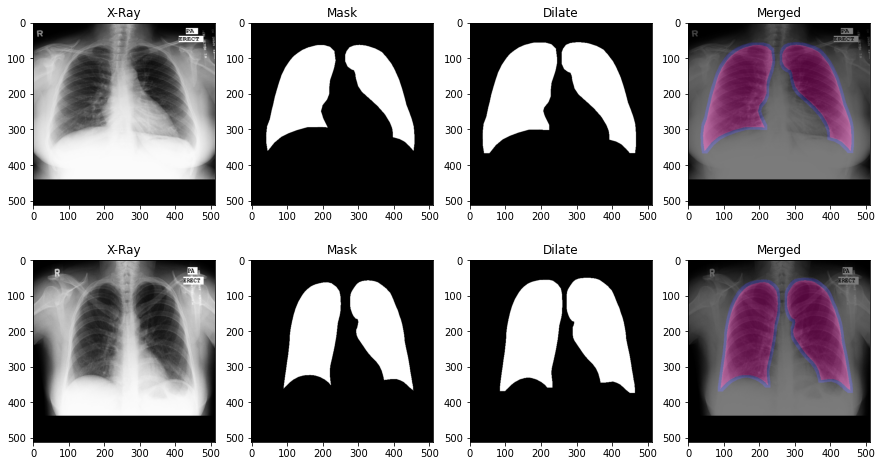

In [ ]:
base_file = os.path.basename(montgomery_train[0])

image_file = os.path.join(segmentation_image_dir,base_file)
mask_image_file = os.path.join(segmentation_mask_dir,base_file)

dilate_image_file = os.path.join(segmentation_dilate_dir,base_file)
image = cv2.imread(image_file)
mask_image = cv2.imread(mask_image_file)
dilate_image = cv2.imread(dilate_image_file)
merged_image = add_colored_dilate(image,mask_image,dilate_image)
fig, axs = plt.subplots( 2, 4, figsize=(15, 8))
axs[0,0].set_title("X-Ray")
axs[0,0].imshow(image)

axs[0,1].set_title("Mask")
axs[0,1].imshow(mask_image)
  
axs[0,2].set_title('Dilate')
axs[0,2].imshow(dilate_image)

axs[0,3].set_title("Merged")
axs[0,3].imshow(merged_image)


base_file = os.path.basename(montgomery_test[0])
filename,fileext  = os.path.splitext( base_file)
image_file = os.path.join(segmentation_test_dir,base_file)
mask_image_file = os.path.join(segmentation_test_dir, \
                                  "%s_mask%s" %(filename,fileext) )
dilate_image_file = os.path.join(segmentation_test_dir, \
                                    "%s_dilate%s" %(filename,fileext))
image = cv2.imread(image_file)

mask_image =cv2.imread(mask_image_file)
dilate_image = cv2.imread(dilate_image_file)
merged_image = add_colored_dilate(image,mask_image,dilate_image)
axs[1, 0].set_title("X-Ray")
axs[1, 0].imshow(image)

axs[1, 1].set_title("Mask")
axs[1, 1].imshow(mask_image)

axs[1, 2].set_title("Dilate")
axs[1, 2].imshow(dilate_image)

axs[1, 3].set_title("Merged")
axs[1, 3].imshow(merged_image)




In [ ]:
shenzhen_mask_dir_1 = glob(os.path.join(shenzhen_mask_dir,'*.png'))
shenzhen_test = shenzhen_mask_dir_1[0:50]
shenzhen_train = shenzhen_mask_dir_1[50:]

for mask_file in tqdm(shenzhen_mask_dir_1):
  base_file = os.path.basename(mask_file).replace("_mask","")
  image_file = os.path.join(shenzhen_image_dir,base_file)
  
  image = cv2.imread(image_file)
  mask = cv2.imread(mask_file,cv2.IMREAD_GRAYSCALE)
  image = cv2.resize(image,(512,512))
  mask = cv2.resize(mask,(512,512))

  mask_dilate = cv2.dilate(mask,DILATE_KERNEL,iterations=1)

  if (mask_file in shenzhen_train):
        cv2.imwrite(os.path.join(segmentation_image_dir , base_file), \
                    image)
        cv2.imwrite(os.path.join(segmentation_mask_dir, base_file), \
                    mask)
        cv2.imwrite(os.path.join(segmentation_dilate_dir, base_file), \
                    mask_dilate)
      
  else:
    filename,fileext = os.path.splitext(base_file)
    cv2.imwrite(os.path.join(segmentation_test_dir, base_file), \
                    image)
    cv2.imwrite(os.path.join(segmentation_test_dir, \
                                 "%s_mask%s" % (filename, fileext)), mask)
    cv2.imwrite(os.path.join(segmentation_test_dir, \
                                 "%s_dilate%s" % (filename, fileext)), mask_dilate)
  

100%|██████████| 566/566 [20:47<00:00,  2.20s/it]


In [ ]:
shenzhen_mask_dir_1 = glob(os.path.join(shenzhen_mask_dir,'*.png'))
shenzhen_test = shenzhen_mask_dir_1[0:50]
shenzhen_train = shenzhen_mask_dir_1[50:]

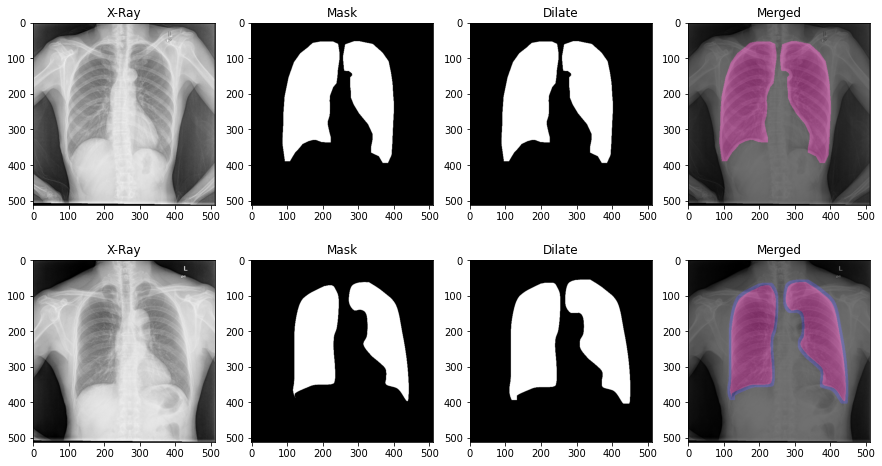

In [ ]:
base_file = os.path.basename(shenzhen_train[0].replace("_mask",""))
image_file = os.path.join(segmentation_image_dir,base_file)
mask_image_file = os.path.join(segmentation_dilate_dir,base_file)
dilate_image_file = os.path.join(segmentation_dilate_dir,base_file)
image = cv2.imread(image_file)
mask_image = cv2.imread(mask_image_file)
dilate_image = cv2.imread(dilate_image_file)
merged_image = add_colored_dilate(image,mask_image,dilate_image)
fig,axs = plt.subplots(2,4,figsize=(15,8))

axs[0, 0].set_title("X-Ray")
axs[0, 0].imshow(image)

axs[0, 1].set_title("Mask")
axs[0, 1].imshow(mask_image)

axs[0, 2].set_title("Dilate")
axs[0, 2].imshow(dilate_image)

axs[0, 3].set_title("Merged")
axs[0, 3].imshow(merged_image)

base_file = os.path.basename(shenzhen_test[0].replace("_mask",""))
image_file = os.path.join(segmentation_test_dir,base_file)
filename,fileext = os.path.splitext(base_file)
mask_image_file = os.path.join(segmentation_test_dir, \
                               "%s_mask%s" % (filename, fileext))

filename, fileext = os.path.splitext(base_file)
image_file = os.path.join(segmentation_test_dir, base_file)
mask_image_file = os.path.join(segmentation_test_dir, \
                               "%s_mask%s" % (filename, fileext))
dilate_image_file = os.path.join(segmentation_test_dir, \
                                 "%s_dilate%s" % (filename, fileext))
image = cv2.imread(image_file)
mask_image = cv2.imread(mask_image_file)
dilate_image = cv2.imread(dilate_image_file)
merged_image = add_colored_dilate(image, mask_image, dilate_image)

axs[1, 0].set_title("X-Ray")
axs[1, 0].imshow(image)

axs[1, 1].set_title("Mask")
axs[1, 1].imshow(mask_image)

axs[1, 2].set_title("Dilate")
axs[1, 2].imshow(dilate_image)

axs[1, 3].set_title("Merged")
axs[1, 3].imshow(merged_image)

In [ ]:
train_files = glob(os.path.join(segmentation_image_dir, "*.png"))
test_files = glob(os.path.join(segmentation_test_dir, "*.png"))
mask_files = glob(os.path.join(segmentation_mask_dir, "*.png"))
dilate_files = glob(os.path.join(segmentation_dilate_dir, "*.png"))

(len(train_files), \
 len(test_files), \
 len(mask_files), \
 len(dilate_files))

(604, 300, 604, 604)

In [ ]:
def train_generator(batch_size, train_path, image_folder, mask_folder, aug_dict,
        image_color_mode="grayscale",
        mask_color_mode="grayscale",
        image_save_prefix="image",
        mask_save_prefix="mask",
        save_to_dir=None,
        target_size=(256,256),
        seed=1):
    '''
    can generate image and mask at the same time use the same seed for
    image_datagen and mask_datagen to ensure the transformation for image
    and mask is the same if you want to visualize the results of generator,
    set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)

    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)

    train_gen = zip(image_generator, mask_generator)
    
    for (img, mask) in train_gen:
        img, mask = adjust_data(img, mask)
        yield (img,mask)

def adjust_data(img,mask):
    img = img / 255
    mask = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    
    return (img, mask)

In [ ]:
def mean_iou(y_true, y_pred):
    true_positives=tf.reduce_sum(tf.round(K.clip(y_true*y_pred, 0, 1)))
    true_negatives=tf.reduce_sum(K.round(K.clip((1-y_true)*(1-y_pred), 0, 1)))
    possible_negatives=tf.reduce_sum(K.round(K.clip((1-y_true), 0, 1)))
    possible_positives=tf.reduce_sum(tf.round(K.clip(y_true, 0, 1)))
    iou = (true_positives)/(possible_negatives - true_negatives + possible_positives + K.epsilon())
    return K.mean(iou)  
  
def sensitivity(y_true,y_pred):
    true_positives=tf.reduce_sum(tf.round(K.clip(y_true*y_pred, 0, 1)))
    possible_positives=tf.reduce_sum(tf.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives+K.epsilon())

def specificity(y_true,y_pred):
    true_negatives=tf.reduce_sum(K.round(K.clip((1-y_true)*(1-y_pred), 0, 1)))
    possible_negatives=tf.reduce_sum(K.round(K.clip((1-y_true), 0, 1)))
    return true_negatives / (possible_negatives+K.epsilon())



def precision(y_true, y_pred):
    """ Precision metric. Only computes a batch-wise average of precision. Computes the precision, a metric for multi-label classification of
    how many selected items are relevant."""
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """ Recall metric. Only computes a batch-wise average of recall. Computes the recall, a metric for multi-label classification of
    how many relevant items are selected. """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [ ]:
ACCURACY_THRESHOLD = 0.95

class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('val_binary_accuracy') > ACCURACY_THRESHOLD):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
			self.model.stop_training = True

# Instantiate a callback object
callbacks = myCallback()

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def unet(input_size=(256,256,1)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='tanh', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])





In [ ]:
def test_load_image(test_file, target_size=(256,256)):
    img = cv2.imread(test_file, cv2.IMREAD_GRAYSCALE)
    img = img / 255
    img = cv2.resize(img, target_size)
    img = np.reshape(img, img.shape + (1,))
    img = np.reshape(img,(1,) + img.shape)
    return img

def test_generator(test_files, target_size=(256,256)):
    for test_file in test_files:
        yield test_load_image(test_file, target_size)
        
def save_result(save_path, npyfile, test_files):
    for i, item in enumerate(npyfile):
        result_file = test_files[i]
        img = (item[:, :, 0] * 255.).astype(np.uint8)

        filename, fileext = os.path.splitext(os.path.basename(result_file))

        result_file = os.path.join(save_path, "%s_predict%s" % (filename, fileext))

        cv2.imwrite(result_file, img)

In [ ]:
def add_suffix(base_file, suffix):
    filename, fileext = os.path.splitext(base_file)
    return "%s_%s%s" % (filename, suffix, fileext)

test_files = [test_file for test_file in glob(os.path.join(segmentation_test_dir, "*.png")) \
              if ("_mask" not in test_file \
                  and "_dilate" not in test_file \
                  and "_predict" not in test_file)]

validation_data = (test_load_image(test_files[0], target_size=(512, 512)),
                    test_load_image(add_suffix(test_files[0], "dilate"), target_size=(512, 512)))

len(test_files), len(validation_data)


(100, 2)

In [ ]:
train_generator_args = dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_gen = train_generator(BATCH_SIZE,
                            segmentation_train_dir,
                            'image',
                            'dilate', 
                            train_generator_args,
                            target_size=(512,512),
                            save_to_dir=os.path.abspath(segmentation_aug_dir))

model = unet(input_size=(512,512,1))
model.compile( optimizer=Adam(lr=1e-5), loss=dice_coef_loss, \
                  metrics=[dice_coef,mean_iou,sensitivity,specificity,precision,recall,'binary_accuracy'])
model.summary()

model_checkpoint = ModelCheckpoint('unet_lung_seg1.hdf5', 
                                   monitor='loss', 
                                   verbose=1, 
                                   save_best_only=True)

history = model.fit(train_gen,
                    steps_per_epoch=len(train_files) / BATCH_SIZE, 
                    epochs=EPOCHS, 
                    callbacks=[model_checkpoint,callbacks],
                    validation_data = validation_data)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 512, 512, 32) 320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 512, 512, 32) 9248        conv2d_19[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 256, 256, 32) 0           conv2d_20[0][0]                  
____________________________________________________________________________________________

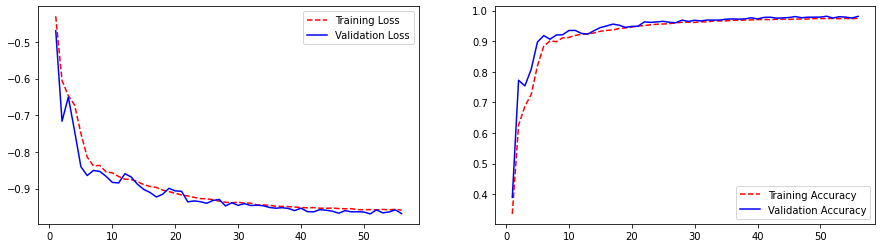

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 4))

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

training_accuracy = history.history['binary_accuracy']
validation_accuracy = history.history['val_binary_accuracy']

epoch_count = range(1, len(training_loss) + 1)

axs[0].plot(epoch_count, training_loss, 'r--')
axs[0].plot(epoch_count, validation_loss, 'b-')
axs[0].legend(['Training Loss', 'Validation Loss'])

axs[1].plot(epoch_count, training_accuracy, 'r--')
axs[1].plot(epoch_count, validation_accuracy, 'b-')
axs[1].legend(['Training Accuracy', 'Validation Accuracy'])

In [ ]:
test_gen = test_generator(test_files, target_size=(512,512))
results = model.predict_generator(test_gen, len(test_files), verbose=1)
save_result(segmentation_test_dir, results, test_files)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


100/100 [==============================] - 51s 515ms/step


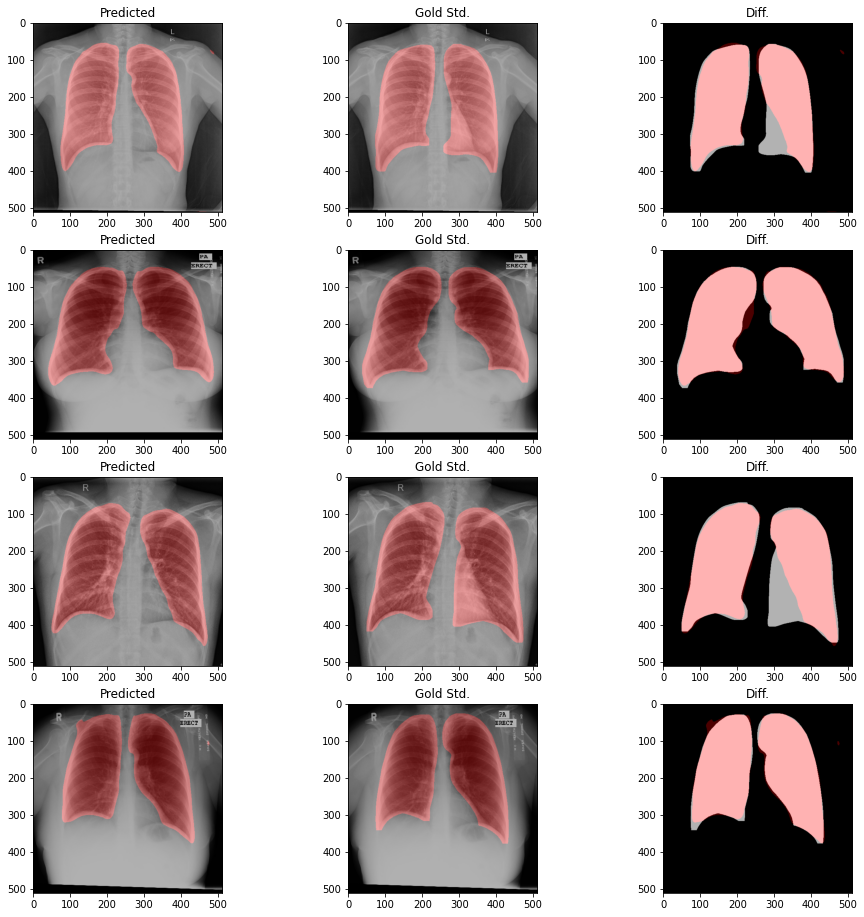

In [ ]:
image = cv2.imread("/content/drive/MyDrive/research2/segmentation/test/CHNCXR_0003_0.png")
predict_image = cv2.imread("/content/drive/MyDrive/research2/segmentation/test/CHNCXR_0003_0_predict.png")
mask_image = cv2.imread("/content/drive/MyDrive/research2/segmentation/test/CHNCXR_0003_0_dilate.png")

fig, axs = plt.subplots(4, 3, figsize=(16, 16))

axs[0, 0].set_title("Predicted")
axs[0, 0].imshow(add_colored_mask(image, predict_image))
axs[0, 1].set_title("Gold Std.")
axs[0, 1].imshow(add_colored_mask(image, mask_image))
axs[0, 2].set_title("Diff.")
axs[0, 2].imshow(diff_mask(mask_image, predict_image))

image = cv2.imread("/content/drive/MyDrive/research2/segmentation/test/MCUCXR_0003_0.png")
predict_image = cv2.imread("/content/drive/MyDrive/research2/segmentation/test/MCUCXR_0003_0_predict.png")
mask_image = cv2.imread("/content/drive/MyDrive/research2/segmentation/test/MCUCXR_0003_0_dilate.png")

axs[1, 0].set_title("Predicted")
axs[1, 0].imshow(add_colored_mask(image, predict_image))
axs[1, 1].set_title("Gold Std.")
axs[1, 1].imshow(add_colored_mask(image, mask_image))
axs[1, 2].set_title("Diff.")
axs[1, 2].imshow(diff_mask(mask_image, predict_image))

image = cv2.imread("/content/drive/MyDrive/research2/segmentation/test/CHNCXR_0020_0.png")
predict_image = cv2.imread("/content/drive/MyDrive/research2/segmentation/test/CHNCXR_0020_0_predict.png")
mask_image = cv2.imread("/content/drive/MyDrive/research2/segmentation/test/CHNCXR_0020_0_dilate.png")

axs[2, 0].set_title("Predicted")
axs[2, 0].imshow(add_colored_mask(image, predict_image))
axs[2, 1].set_title("Gold Std.")
axs[2, 1].imshow(add_colored_mask(image, mask_image))
axs[2, 2].set_title("Diff.")
axs[2, 2].imshow(diff_mask(mask_image, predict_image))

image = cv2.imread("/content/drive/MyDrive/research2/segmentation/test/MCUCXR_0016_0.png")
predict_image = cv2.imread("/content/drive/MyDrive/research2/segmentation/test/MCUCXR_0016_0_predict.png")
mask_image = cv2.imread("/content/drive/MyDrive/research2/segmentation/test/MCUCXR_0016_0_dilate.png")

axs[3, 0].set_title("Predicted")
axs[3, 0].imshow(add_colored_mask(image, predict_image))
axs[3, 1].set_title("Gold Std.")
axs[3, 1].imshow(add_colored_mask(image, mask_image))
axs[3, 2].set_title("Diff.")
axs[3, 2].imshow(diff_mask(mask_image, predict_image))